In [459]:
# The following code is a Neural Network Predict for Hospital Attendance using a 
# database from a Brazilian Hospital. Everything is written in English and the important
# parts are commented for better understandment. 

# Giovana de Moura, 2025

In [460]:
# imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#imported data base
noShows = pd.read_csv("datahospital.csv")
noShows.head(5)  


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [461]:
# 'rename' function
noShows.rename(columns={'Hipertension' : 'Hypertension',
                       'Handcap' : 'Handicap'}, inplace=True)

In [462]:
# It's better to exchange 'F and M' for '1 and 0', for this, we can use
# the function .map

noShows['Gender'] = noShows['Gender'].map({'F' : 1, 'M' : 0})
noShows['No-show'] = noShows['No-show'].map({'No' : 1, 'Yes' : 0})

# Also, let's drop the id columns (not useful for data vizualization
noShows = noShows.drop(['PatientId',	'AppointmentID'], axis=1)
noShows.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [463]:
# Dealing with data

# turning str into day-time datatype
noShows['ScheduledDay'] = noShows['ScheduledDay'].apply(np.datetime64)
# now, to see only the date
noShows['ScheduledDay'] = noShows['ScheduledDay'].dt.date 


In [464]:
noShows['AppointmentDay'] = noShows['AppointmentDay'].apply(np.datetime64)
noShows['AppointmentDay'] = noShows['AppointmentDay'].dt.date 

In [465]:
# Now, we can compare both of them. We are going to create a new column called
# "WaitingTime", to show the diference between the dates
noShows['WaitingTime'] = noShows['AppointmentDay'] - noShows['ScheduledDay']

In [466]:
# Sorting the ages 
np.sort(noShows['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [467]:
# Let's convert the 'Neighbourhood' column into something useful
# The code below is for creating 1 new variable for every possible neighbourhood. This way,
# the number 1 shows if that is the actual one. Now we can deal with them. 
dummy_col = ['Neighbourhood']
noShows = pd.get_dummies(noShows, columns = dummy_col)

# Not the best way, because now we have too many columns! But it's just for testing.

In [468]:
# Changing the type to int
noShows['WaitingTime'] = pd.to_timedelta((noShows['AppointmentDay'] - noShows['ScheduledDay'])).dt.days  
noShows['WaitingTime'] = noShows['WaitingTime'].apply(np.int64)

In [469]:
# Now, we are going to train our network

In [470]:
# Let's decide what variables we are using for training. 
# We didn't use 'No Show' because that's what we want to predict
training_vars = ['Gender', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 
       'WaitingTime']

In [471]:
# Now, divide into TESTING and TRAINING so it doesn't learn patterns
from sklearn.model_selection import train_test_split
# This function from sklearn is used to divide the set in two
train, test = train_test_split(noShows, test_size = 0.15)

In [472]:
# Saying the columns we want
train_x = train[training_vars] # input
train_y = train['No-show'] # the expected result

test_x = test[training_vars]
test_y = test['No-show']

In [473]:
# Importing the neural network funcion from sklearn
from sklearn.neural_network import MLPClassifier

In [474]:
model = MLPClassifier(hidden_layer_sizes={5,2})

In [475]:
# Input 
model.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes={2, 5})

In [476]:
# calculating the probabilities of class 1
prediction_proba = model.predict_proba(test_x)
proba_predict = prediction_proba[:,1]
prediction

array([0.83062727, 0.74368409, 0.83321407, ..., 0.82584893, 0.79014906,
       0.80259488])

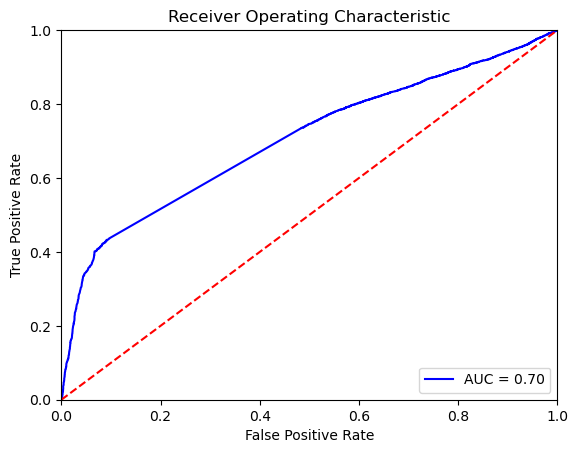

In [477]:
# Plotting to be easier to vizualize
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(test_y, proba_predict)
roc_auc = metrics.auc(fpr, tpr)

# Defining the graph parameters
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right') # subtitle position
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1]) # x limits values
plt.ylim([0, 1]) # y limits values
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()